# Introduction

The data that is being used in this supervised learning model is Titanic passenger data. The amount of the data in this dataset is 891 passengers. Objective of this model is to predict the sorts of people that would likely survive on the same accident.  

## Data Loading & Exploratory Data Analysis

In [107]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [59]:
#Loading and overview of the data
titanic = pd.read_csv ("train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#filtering the data based on passengers survived
filter = titanic ['Survived'] == 1
titanic_survive = titanic [filter]
titanic_survive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


-Looking at the Age, the average age of the survivor is at age 28, while the youngest was 0.42 (infant). 75% of the survivor is suprisingly below the age of 36, while the oldest survivor was 80 years old

-Looking at the fare, there were high deviation between the mean and the median, which mean the fare is positively skewed. Interestingly the minimum fare payed by the survivor is at 0, maybe this is the fare of infant (as explained by the youngest survivor)

In [87]:
titanic_survive ['Pclass']. value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

The survivor is dominated by the passengers in first class and third class, with first class with the highest number of survivor

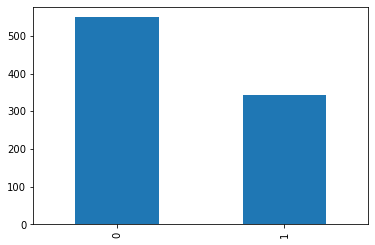

In [88]:
# bar chart of survivor
titanic_survivor = titanic ['Survived'].value_counts()
titanic_survivor. plot (kind = 'bar')
plt.show()

The number of survivor is less than those who fallen

<AxesSubplot:>

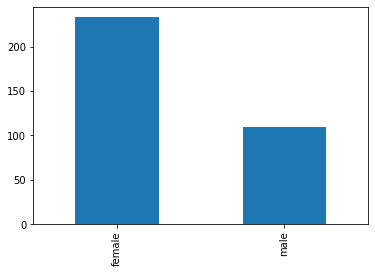

In [89]:
# bar chart based on survivor sex
titanic_survivor_sex = titanic_survive ['Sex'].value_counts()
titanic_survivor_sex.plot (kind = 'bar')

The number of female survivor doubled the male survivor

<AxesSubplot:>

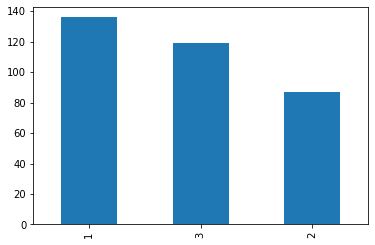

In [115]:
#bar chart based on passenger class
titanic_survivor_pclass = titanic_survive ['Pclass'].value_counts()
titanic_survivor_pclass.plot(kind='bar')

## Data Preprocessing

In [90]:
#replacing the sex variable from string to integer
sex_dict = {'male':1,'female':2}
titanic ['Sex'].replace (sex_dict, inplace = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [27]:
# Designate the feature column as independent variable
feature_column = ['Pclass','Sex','Fare','Parch']
titanic [featured]

,Pclass,Sex,Fare,Parch
0,3,1,7.2500,0
1,1,2,71.2833,0
2,3,2,7.9250,0
3,1,2,53.1000,0
4,3,1,8.0500,0
...,...,...,...,...
886,2,1,13.0000,0
887,1,2,30.0000,0
888,3,2,23.4500,2
889,1,1,30.0000,0


In [43]:
#Splitting the dataset into 80% train size 20% test size
x = titanic [feature_column].to_numpy()
y = titanic ['Survived'].to_numpy()
x_train, x_test, y_train, y_test = model_selection.train_test_split (x,y,train_size = 0.8,
                                                                    random_state = 0)

## Model Definition

The best algorithm to be used is RandomForestClassifier (at max depth of 11) as the score is the highest among the other algorithm

### Random Forest Classifier

In [56]:
randomforest_model = RandomForestClassifier (max_depth = 11)
randomforest_model.fit (x_train, y_train)
randomforest_model.score(x_train,y_train)

0.9143258426966292

### KNN

Text(0, 0.5, 'Error mean')

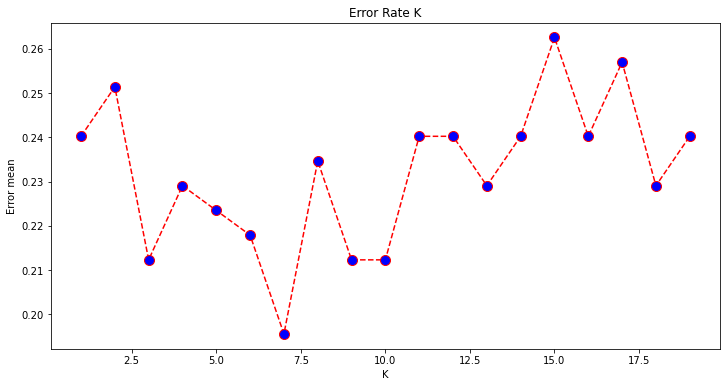

In [45]:
#Checking the optimal value for n_neighbors
error = []

for i in range (1,20):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit (x_train, y_train)
    pred_i = knn.predict (x_test)
    error.append (np.mean(pred_i !=y_test))
    
plt.figure (figsize = (12,6))
plt.plot (range (1,20), error, color = 'red', linestyle = 'dashed', marker = 'o',
          markerfacecolor ='blue', markersize = 10)
plt.title ('Error Rate K')
plt.xlabel ('K')
plt.ylabel ('Error mean')

In [104]:
#the optimum n_neighbors is around 7 with the lowest Error rate
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit (x_train, y_train)
print(knn_model.score(x_train,y_train))

0.8061797752808989


### LogisticRegression

In [58]:
logisticreg_model = LogisticRegression()
logisticreg_model.fit (x_train, y_train)
logisticreg_model.score(x_train,y_train)

0.7935393258426966

## Model Evaluation

In [91]:
#score of the trained dataset
randomforest_model = RandomForestClassifier (max_depth = 11)
randomforest_model.fit (x_train, y_train)
randomforest_model.score(x_train,y_train)

0.9129213483146067

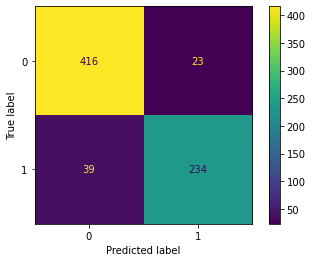

In [92]:
plot_confusion_matrix (randomforest_model,x_train,y_train)

In [100]:
#score of the test dataset
randomforest_model.score (x_test,y_test)

0.8659217877094972

## Model Inference

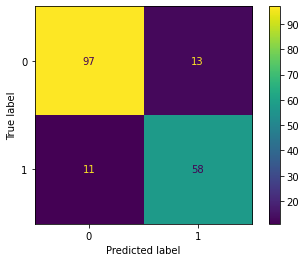

In [105]:
plot_confusion_matrix (randomforest_model,x_test,y_test)

- based on the trained data, the model can predict 234 true positive and 416 true negative out of 712 trained data (91% accuracy)

- Running the model on test data, the model can predict 58 true positive and 97 true negative out of 179 test data (86.5% accuracy)

## Model Saving

In [145]:
pickle.dump (randomforest_model,open ('./h8deployment/model/testing_model.pkl','wb'))

In [146]:
from flask import Flask

In [110]:
model = pickle.load (open('./h8deployment/model/testing_model.pkl','rb'))